
TODO:
    -figure out how to use latex here
    -write report

In [1]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import seaborn as sns
sns.set_theme()

In [2]:
def gen_bernulli(p, size):
    """    
    Generates random sample [X1, X2,.. X_{size}] where Xi ~ Bern(p)
    """
    for i in range(size):
        if (sps.uniform.rvs() < p):
            yield 1
        else:
            yield 0
#end of gen_bernulli

print(list(gen_bernulli(0.5, 10))) 

[0, 0, 1, 0, 1, 1, 1, 1, 0, 0]


In [3]:
def gen_binomial(n,p, size):
    """
    Generates random sample [X1, X2,.. X_{size}] where Xi ~ Bi(n,p)
    """
    for i in range(size):
        yield np.sum(np.array(list(gen_bernulli(p, n))))
#end of binomial

print(list(gen_binomial(10,0.5, 10)))

[7, 5, 4, 6, 5, 4, 6, 7, 4, 3]


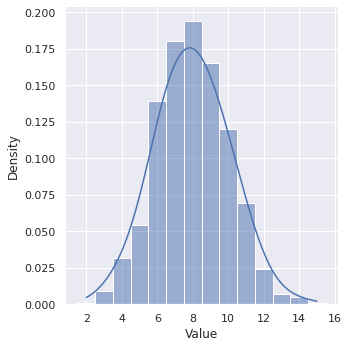

In [8]:
sample = list(gen_binomial(16,0.5, 1000))
df = pd.DataFrame({"Value": sample})
sns.displot(data=df, x="Value", discrete=True, stat="density", kde=True, kde_kws={"bw_adjust": 2})